In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [12]:
data = pd.read_csv('./data/preprocessing_kbo2010.csv')
data

year  month  day ground home_team  home_score home_result away_result  \
0    2010      3   27     잠실        두산           8           승           패   
1    2010      3   28     잠실        두산          10           승           패   
2    2010      3   30     잠실        LG           0           패           승   
3    2010      3   30     목동        넥센           2           패           승   
4    2010      4    2     잠실        LG           5           패           승   
..    ...    ...  ...    ...       ...         ...         ...         ...   
527  2010      6   23     마산        롯데           3           승           패   
528  2010      6   24     마산        롯데           9           승           패   
529  2010      7    6     마산        롯데           6           승           패   
530  2010      7    7     마산        롯데           2           패           승   
531  2010      7    8     마산        롯데          10           승           패   

     away_score away_team   seats  grass_type  center_id center_name  \
0             3        기아  24,411           1        108          서울   
1             9        기아  24,411           1        108          서울   
2             3        SK  24,411           1        108          서울   
3             7        두산  12,500           0        108          서울   
4            14        넥센  24,411           1        108          서울   
..          ...       ...     ...         ...        ...         ...   
527           1        한화   20000           0        155          창원   
528           5        한화   20000           0        155          창원   
529           4        넥센   20000           0        155          창원   
530           3        넥센   20000           0        155          창원   
531           4        넥센   20000           0        155          창원   

     avg_temp  avg_rain  avg_wind  
0         5.4       0.0       3.5  
1         4.1       0.0       3.2  
2         8.3       0.0       2.2  
3         8.3       0.0       2.2  
4         5.5       0.0       3.7  
..        ...       ...       ...  
527      22.1       0.0       2.3  
528      22.9       0.0       1.8  
529      27.0       0.0       1.3  
530      25.3       2.0       1.9  
531      23.7       0.0       1.4  

[532 rows x 17 columns]

In [13]:
# 컬럼별 요약통계량

data.describe()

year       month         day  home_score  away_score  grass_type  \
count   532.0  532.000000  532.000000  532.000000  532.000000  532.000000   
mean   2010.0    6.240602   15.451128    4.827068    5.137218    0.828947   
std       0.0    1.708075    8.846007    3.503050    3.412888    0.376909   
min    2010.0    3.000000    1.000000    0.000000    0.000000    0.000000   
25%    2010.0    5.000000    8.000000    2.000000    3.000000    1.000000   
50%    2010.0    6.000000   15.000000    4.000000    4.000000    1.000000   
75%    2010.0    8.000000   23.000000    7.000000    7.000000    1.000000   
max    2010.0    9.000000   31.000000   21.000000   21.000000    1.000000   

        center_id    avg_temp    avg_rain    avg_wind  
count  532.000000  532.000000  532.000000  532.000000  
mean   128.005639   20.702068    4.157143    2.411090  
std     20.440672    6.792256   13.365664    0.940814  
min    108.000000    3.600000    0.000000    0.700000  
25%    108.000000   16.575000    0.000000    1.800000  
50%    121.500000   23.000000    0.000000    2.200000  
75%    143.000000   26.025000    0.500000    2.700000  
max    159.000000   31.000000  104.500000    7.100000

In [56]:
data['temp_effect'] = [1 if i > 23 else 0 for i in data['avg_temp']]
data['rain_effect'] = [1 if i != 0 else 0 for i in data['avg_rain']]
data['wind_effect'] = [1 if i > 2 else 0 for i in data['avg_wind']]

data['home_win'] = [1 if i =='승' else 0 for i in data['home_result']]
data['total_score'] = data['home_score'] + data['away_score']

In [57]:
data

year  month  day ground home_team  home_score home_result away_result  \
0    2010      3   27     잠실        두산           8           승           패   
1    2010      3   28     잠실        두산          10           승           패   
2    2010      3   30     잠실        LG           0           패           승   
3    2010      3   30     목동        넥센           2           패           승   
4    2010      4    2     잠실        LG           5           패           승   
..    ...    ...  ...    ...       ...         ...         ...         ...   
527  2010      6   23     마산        롯데           3           승           패   
528  2010      6   24     마산        롯데           9           승           패   
529  2010      7    6     마산        롯데           6           승           패   
530  2010      7    7     마산        롯데           2           패           승   
531  2010      7    8     마산        롯데          10           승           패   

     away_score away_team  ... center_id  center_name  avg_temp avg_rain  \
0             3        기아  ...       108           서울       5.4      0.0   
1             9        기아  ...       108           서울       4.1      0.0   
2             3        SK  ...       108           서울       8.3      0.0   
3             7        두산  ...       108           서울       8.3      0.0   
4            14        넥센  ...       108           서울       5.5      0.0   
..          ...       ...  ...       ...          ...       ...      ...   
527           1        한화  ...       155           창원      22.1      0.0   
528           5        한화  ...       155           창원      22.9      0.0   
529           4        넥센  ...       155           창원      27.0      0.0   
530           3        넥센  ...       155           창원      25.3      2.0   
531           4        넥센  ...       155           창원      23.7      0.0   

     avg_wind  temp_effect  rain_effect  wind_effect  home_win  total_score  
0         3.5            0            0            1         1           11  
1         3.2            0            0            1         1           19  
2         2.2            0            0            1         0            3  
3         2.2            0            0            1         0            9  
4         3.7            0            0            1         0           19  
..        ...          ...          ...          ...       ...          ...  
527       2.3            0            0            1         1            4  
528       1.8            0            0            0         1           14  
529       1.3            1            0            0         1           10  
530       1.9            1            1            0         0            5  
531       1.4            1            0            0         1           14  

[532 rows x 22 columns]

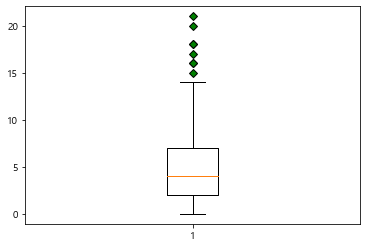

In [58]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data['home_score'], flierprops=green_diamond)        # vert=False : 가로그래프
plt.show()

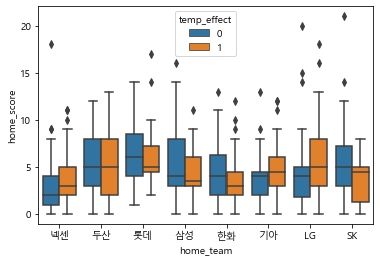

In [59]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 홈팀 / 기온에 따른 팀별 스코어
sns.boxplot(x = 'home_team', y = 'home_score', hue = 'temp_effect', data = data,
           order = ['넥센', '두산', '롯데', '삼성', '한화', '기아', 'LG', 'SK'])
plt.show()

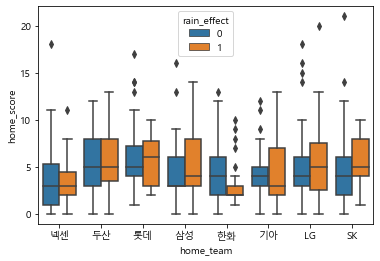

In [60]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 홈팀 / 강수량에 따른 팀별 스코어
sns.boxplot(x = 'home_team', y = 'home_score', hue = 'rain_effect', data = data,
           order = ['넥센', '두산', '롯데', '삼성', '한화', '기아', 'LG', 'SK'])
plt.show()

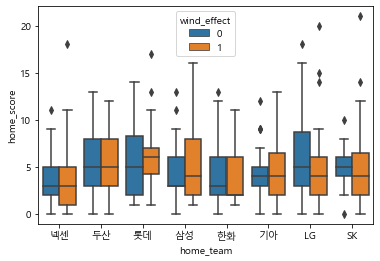

In [61]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 홈팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'home_team', y = 'home_score', hue = 'wind_effect', data = data,
           order = ['넥센', '두산', '롯데', '삼성', '한화', '기아', 'LG', 'SK'])
plt.show()

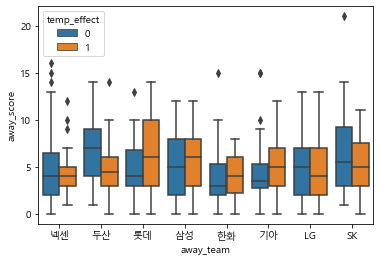

In [62]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 기온에 따른 팀별 스코어
sns.boxplot(x = 'away_team', y = 'away_score', hue = 'temp_effect', data = data,
           order = ['넥센', '두산', '롯데', '삼성', '한화', '기아', 'LG', 'SK'])
plt.show()

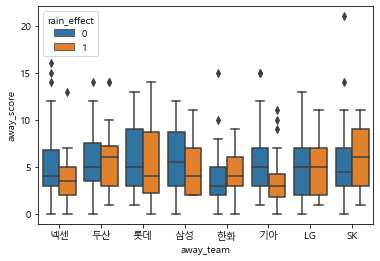

In [63]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 강수량에 따른 팀별 스코어
sns.boxplot(x = 'away_team', y = 'away_score', hue = 'rain_effect', data = data,
           order = ['넥센', '두산', '롯데', '삼성', '한화', '기아', 'LG', 'SK'])
plt.show()

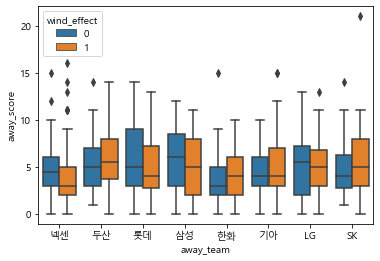

In [64]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'away_team', y = 'away_score', hue = 'wind_effect', data = data,
           order = ['넥센', '두산', '롯데', '삼성', '한화', '기아', 'LG', 'SK'])
plt.show()

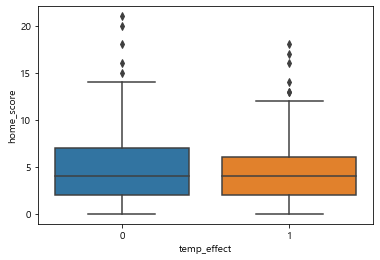

In [65]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 홈경기에서 기온에 따른 점수획득량
sns.boxplot(x = 'temp_effect', y = 'home_score', data = data)
plt.show()

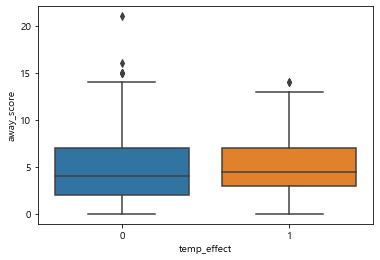

In [66]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정경기에서 기온에 따른 점수획득량
sns.boxplot(x = 'temp_effect', y = 'away_score', data = data)
plt.show()

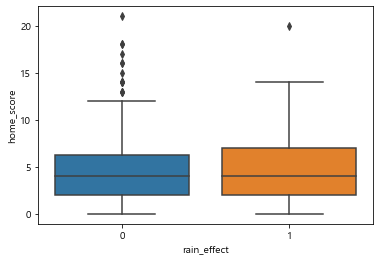

In [67]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 홈경기에서 강수량에 따른 점수획득량
sns.boxplot(x = 'rain_effect', y = 'home_score', data = data)
plt.show()

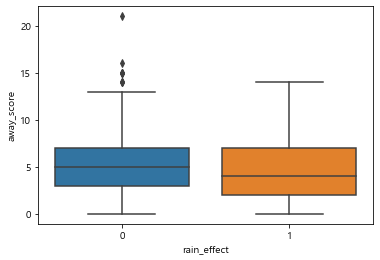

In [68]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정경기에서 강수량에 따른 점수획득량
sns.boxplot(x = 'rain_effect', y = 'away_score', data = data)
plt.show()

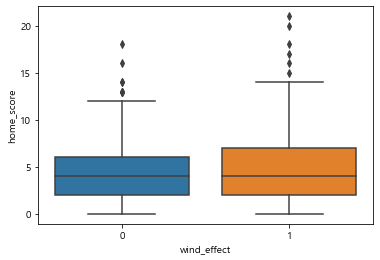

In [69]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 홈경기에서 풍속에 따른 점수획득량
sns.boxplot(x = 'wind_effect', y = 'home_score', data = data)
plt.show()

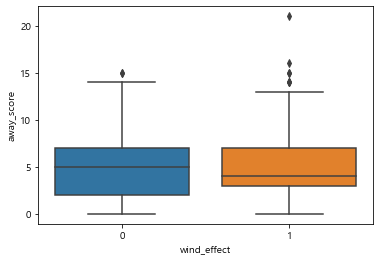

In [70]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정경기에서 풍속에 따른 점수획득량
sns.boxplot(x = 'wind_effect', y = 'away_score', data = data)
plt.show()

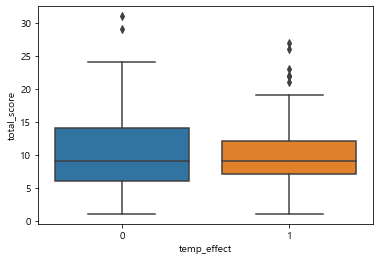

In [71]:
sns.boxplot(x = 'temp_effect', y = 'total_score', data = data)
plt.show()

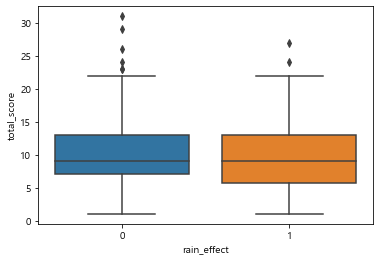

In [72]:
sns.boxplot(x = 'rain_effect', y = 'total_score', data = data)
plt.show()

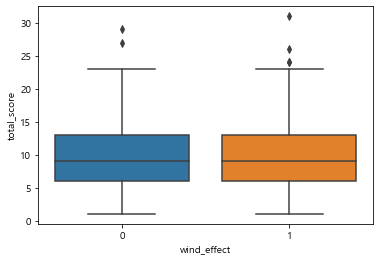

In [73]:
sns.boxplot(x = 'wind_effect', y = 'total_score', data = data)
plt.show()

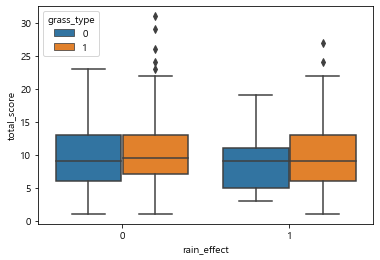

In [74]:
sns.boxplot(x = 'rain_effect', y = 'total_score', hue = 'grass_type', data = data)
plt.show()

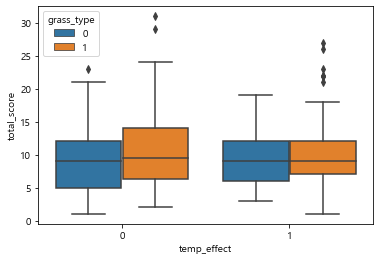

In [75]:
sns.boxplot(x = 'temp_effect', y = 'total_score', hue = 'grass_type', data = data)
plt.show()

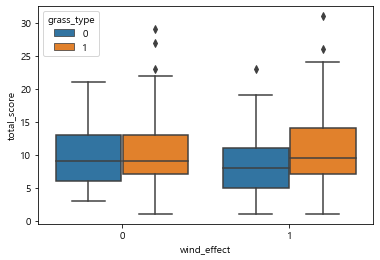

In [76]:
sns.boxplot(x = 'wind_effect', y = 'total_score', hue = 'grass_type', data = data)
plt.show()

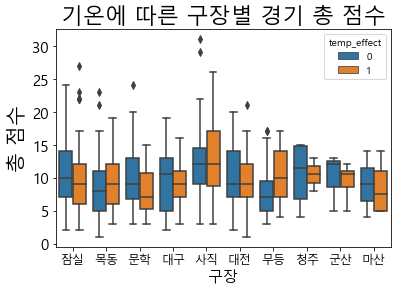

In [113]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'temp_effect', data = data)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('기온에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

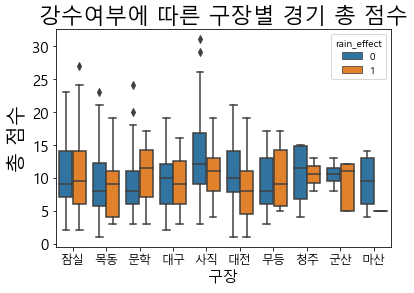

In [114]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'rain_effect', data = data)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('강수여부에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

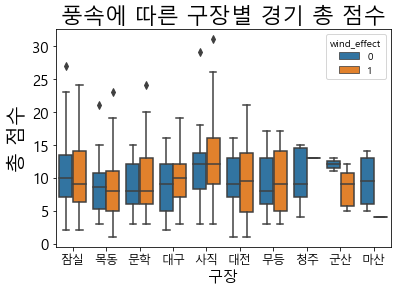

In [115]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'wind_effect', data = data)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('풍속에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

In [117]:
df = pd.read_csv('./data/final2010.csv')
df

year  month  day ground home_team  home_score home_result away_result  \
0     2010      3   27     대구        삼성           5           패           승   
1     2010      3   27     대구        삼성           5           패           승   
2     2010      3   27     대구        삼성           5           패           승   
3     2010      3   27     대구        삼성           5           패           승   
4     2010      3   27     대구        삼성           5           패           승   
...    ...    ...  ...    ...       ...         ...         ...         ...   
5297  2010      9   26     잠실        LG           1           패           승   
5298  2010      9   26     잠실        LG           1           패           승   
5299  2010      9   26     잠실        LG           1           패           승   
5300  2010      9   26     잠실        LG           1           패           승   
5301  2010      9   26     잠실        LG           1           패           승   

      away_score away_team  ... RBI  SB  CS BB  HBP  SO  GDP   avg1   avg2  \
0              7        LG  ...   0   0   0  0    0   2    0  0.000  0.000   
1              7        LG  ...   0   0   0  0    0   0    0      -  0.000   
2              7        LG  ...   0   0   0  0    0   1    0  0.000  0.000   
3              7        LG  ...   3   0   0  1    0   2    0  0.500  0.500   
4              7        LG  ...   0   1   0  1    0   0    0  0.250  0.250   
...          ...       ...  ...  ..  ..  .. ..  ...  ..  ...    ...    ...   
5297           6        삼성  ...   0   0   0  0    0   1    0  0.000  0.192   
5298           6        삼성  ...   0   0   0  0    0   0    0  0.000  0.271   
5299           6        삼성  ...   2   0   0  0    0   0    0  1.000  0.272   
5300           6        삼성  ...   2   0   0  0    0   2    0  0.250  0.292   
5301           6        삼성  ...   0   0   0  0    0   1    0  0.000  0.279   

      home_play  
0             0  
1             0  
2             0  
3             0  
4             0  
...         ...  
5297          0  
5298          0  
5299          0  
5300          0  
5301          0  

[5302 rows x 42 columns]

In [122]:
df[['avg_pressure', 'avg_humidity', 'avg_ground_temp']].describe()

avg_pressure  avg_humidity  avg_ground_temp
count   5302.000000   5302.000000      5302.000000
mean    1003.766975     65.750038        23.294794
std        6.223253     14.401695         6.870141
min      985.100000     27.600000         5.000000
25%      999.200000     54.300000        19.600000
50%     1003.900000     67.500000        25.600000
75%     1007.600000     76.600000        28.600000
max     1019.900000     94.600000        35.700000

In [123]:
df['temp_effect'] = [1 if i > 23 else 0 for i in df['avg_temp']]
df['rain_effect'] = [1 if i != 0 else 0 for i in df['avg_rain']]
df['wind_effect'] = [1 if i > 2 else 0 for i in df['avg_wind']]
df['pressure_effect'] = [1 if i > 1000 else 0 for i in df['avg_pressure']]
df['humidity_effect'] = [1 if i > 67.5 else 0 for i in df['avg_humidity']]
df['ground_effect'] = [1 if i > 25 else 0 for i in df['avg_ground_temp']]

df['home_win'] = [1 if i =='승' else 0 for i in df['home_result']]
df['total_score'] = df['home_score'] + df['away_score']

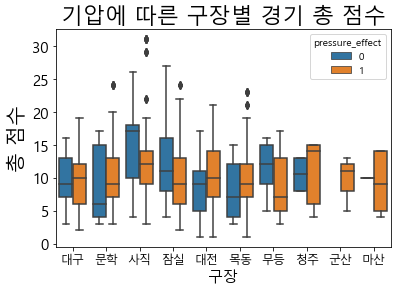

In [125]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'pressure_effect', data = df)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('기압에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

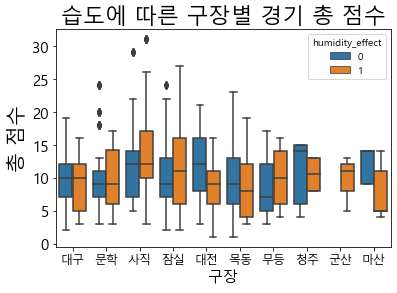

In [126]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'humidity_effect', data = df)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('습도에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

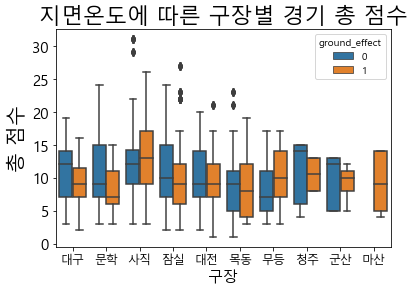

In [133]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'ground_effect', data = df)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('지면온도에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

In [ ]:
# 한글깨짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'

# 원정팀 / 풍속에 따른 팀별 스코어
sns.boxplot(x = 'ground', y = 'total_score', hue = 'temp_effect', data = df)

plt.xticks(fontsize = '12')
plt.yticks(fontsize = '15')
plt.title('기압에 따른 구장별 경기 총 점수', size = 22)
plt.xlabel('구장', size = 15)
plt.ylabel('총 점수', size = 20)
plt.show()

C:\Users\asuspc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\asuspc\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


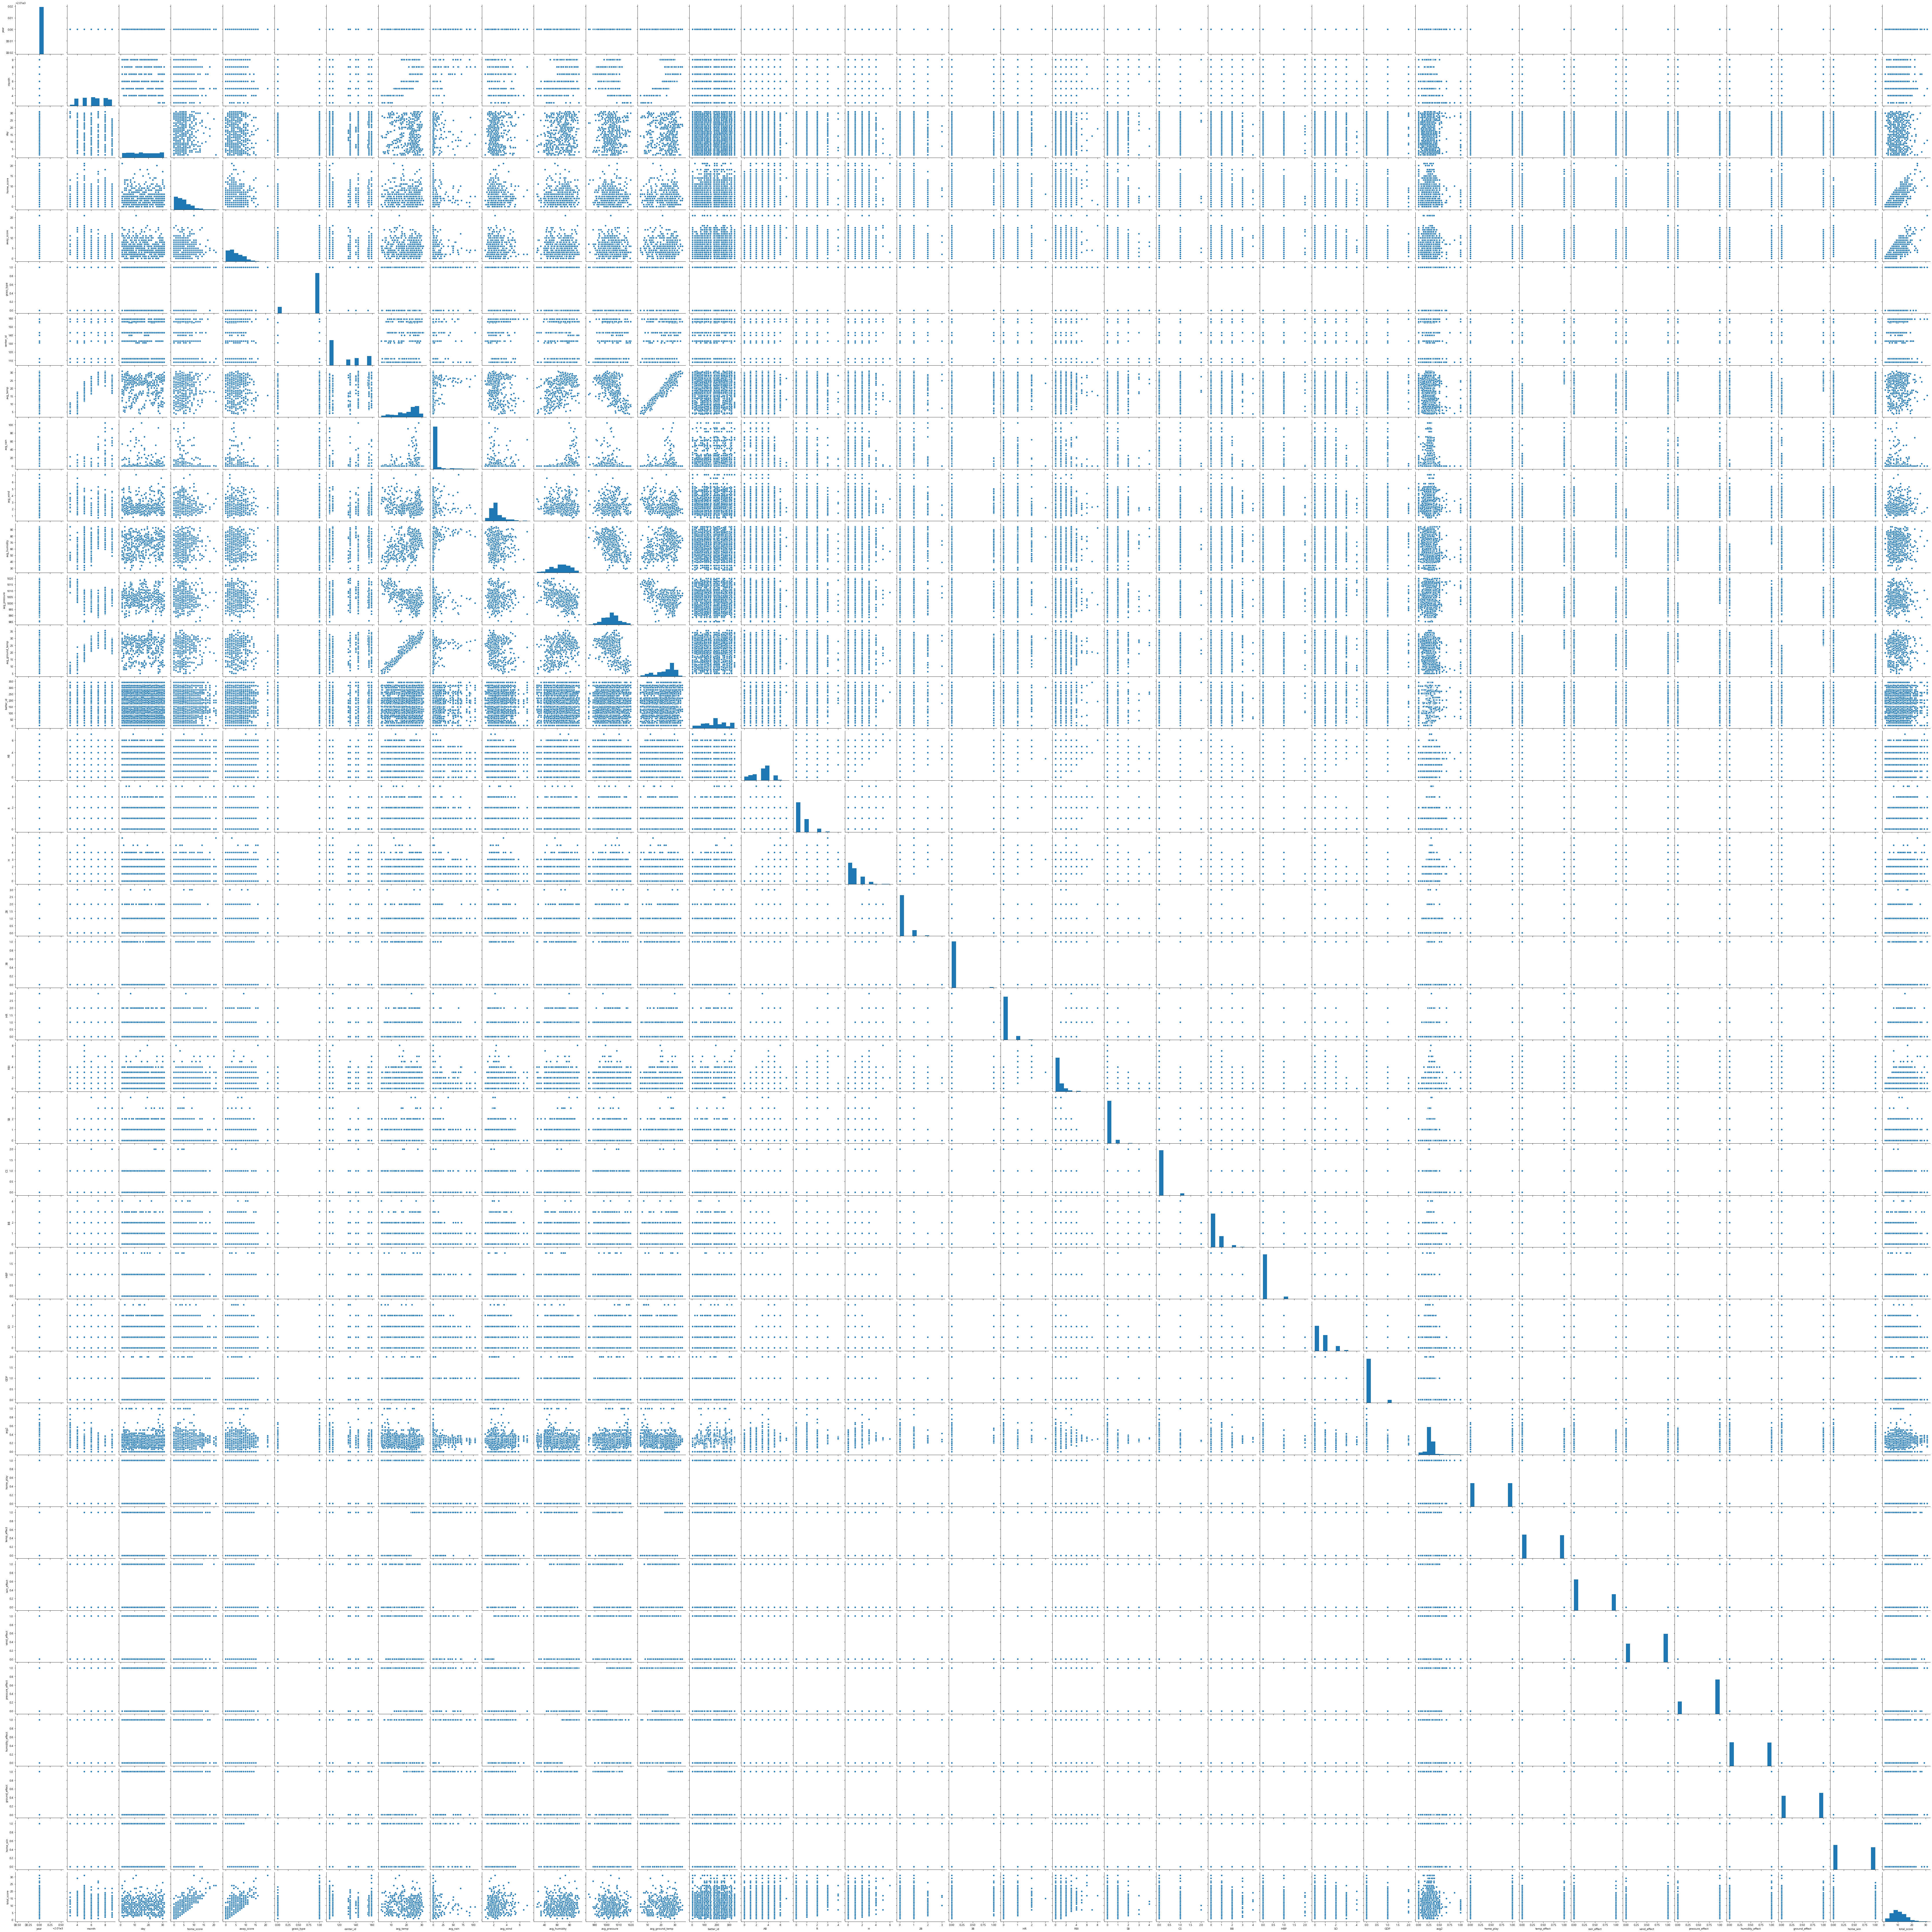

In [151]:
sns.pairplot(df, diag_kind = 'hist')
plt.show()

In [ ]:
df.to_csv('./data/corr_kbo.csv', encoding = 'utf-8', index = False)

In [153]:
df.describe()

year        month          day   home_score   away_score  \
count  5302.0  5302.000000  5302.000000  5302.000000  5302.000000   
mean   2010.0     6.353640    15.496982     4.939268     5.268578   
std       0.0     1.715907     8.804694     3.579070     3.447495   
min    2010.0     3.000000     1.000000     0.000000     0.000000   
25%    2010.0     5.000000     8.000000     2.000000     3.000000   
50%    2010.0     6.000000    15.000000     4.000000     5.000000   
75%    2010.0     8.000000    23.000000     7.000000     7.000000   
max    2010.0     9.000000    31.000000    21.000000    21.000000   

        grass_type    center_id     avg_temp     avg_rain     avg_wind  ...  \
count  5302.000000  5302.000000  5302.000000  5302.000000  5302.000000  ...   
mean      0.858544   126.511505    20.924048     4.165409     2.394776  ...   
std       0.348524    20.030917     6.693191    13.371333     0.916085  ...   
min       0.000000   108.000000     3.600000     0.000000     0.700000  ...   
25%       1.000000   108.000000    16.700000     0.000000     1.800000  ...   
50%       1.000000   112.000000    23.000000     0.000000     2.200000  ...   
75%       1.000000   143.000000    26.100000     0.500000     2.700000  ...   
max       1.000000   159.000000    31.000000   104.500000     7.100000  ...   

              avg2    home_play  temp_effect  rain_effect  wind_effect  \
count  5302.000000  5302.000000  5302.000000  5302.000000  5302.000000   
mean      0.269396     0.499246     0.496039     0.340626     0.602791   
std       0.086318     0.500047     0.500031     0.473965     0.489366   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.241000     0.000000     0.000000     0.000000     0.000000   
50%       0.280000     0.000000     0.000000     0.000000     1.000000   
75%       0.307000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       pressure_effect  humidity_effect  ground_effect     home_win  \
count      5302.000000      5302.000000    5302.000000  5302.000000   
mean          0.733308         0.497925       0.533384     0.474915   
std           0.442272         0.500043       0.498931     0.499417   
min           0.000000         0.000000       0.000000     0.000000   
25%           0.000000         0.000000       0.000000     0.000000   
50%           1.000000         0.000000       1.000000     0.000000   
75%           1.000000         1.000000       1.000000     1.000000   
max           1.000000         1.000000       1.000000     1.000000   

       total_score  
count  5302.000000  
mean     10.207846  
std       4.984166  
min       1.000000  
25%       7.000000  
50%      10.000000  
75%      13.000000  
max      31.000000  

[8 rows x 37 columns]